In [1]:
import pandas as pd
df = pd.read_csv('Wholesale customers data.csv')　#データの読み込み

In [14]:
df.describe() #データの観察

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000
mean,1.304233,2.537037,9561.859788,4485.500000,6483.100529,2375.206349,2250.349206,1093.616402
std,0.460692,0.777641,7991.727178,3805.300102,6041.192513,2623.219768,2971.520734,935.779675
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,2951.250000,1449.250000,2063.250000,660.250000,246.750000,379.000000
50%,1.000000,3.000000,7583.500000,3291.500000,4164.500000,1386.000000,748.000000,812.500000
75%,2.000000,3.000000,14397.500000,6456.250000,9542.000000,3038.500000,3579.750000,1540.000000
max,2.000000,3.000000,34454.000000,18664.000000,28986.000000,13486.000000,15469.000000,4829.000000


In [17]:
df['Total'] = df[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']].sum(axis=1)
df[['Region','Total']].groupby(['Region']).count()
#1:Lisbon, 2:Operto, 3:Other Regions

,Total
Region,
1,67
2,41
3,270


In [18]:
df.drop('Channel',axis=1).groupby(['Region']).sum()
#

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total
Region,,,,,,,
1,615513,292580,403741,169472,143625,69532,1694463
2,410622,167584,294945,109664,97548,44559,1124922
3,2588248,1235355,1751926,618692,609459,299296,7102976


In [19]:
df.drop('Channel',axis=1).groupby(['Region']).mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total
Region,,,,,,,
1,9186.761194,4366.865672,6025.985075,2529.432836,2143.656716,1037.791045,25290.492537
2,10015.170732,4087.414634,7193.780488,2674.731707,2379.219512,1086.804878,27437.121951
3,9586.103704,4575.388889,6488.614815,2291.451852,2257.255556,1108.503704,26307.318519


In [20]:
df[['Channel','Total']].groupby(['Channel']).count()

,Total
Channel,
1,263
2,115


In [21]:
df.drop('Region',axis=1).groupby(['Channel']).sum()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total
Channel,,,,,,,
1,2734401,776378,942995,721145,204560,266190,5645669
2,879982,919141,1507617,176683,646072,147197,4276692


In [22]:
df.drop('Region',axis=1).groupby(['Channel']).mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total
Channel,,,,,,,
1,10396.961977,2952.007605,3585.532319,2741.996198,777.794677,1012.129278,21466.422053
2,7652.017391,7992.530435,13109.713043,1536.373913,5618.017391,1279.973913,37188.626087


In [23]:
df[['Region','Channel','Total']].groupby(['Region','Channel']).count()

Total
Region Channel       
1      1           53
       2           14
2      1           26
       2           15
3      1          184
       2           86

In [24]:
df.groupby(['Region','Channel']).sum()

Fresh    Milk  Grocery  Frozen  Detergents_Paper  \
Region Channel                                                       
1      1         542716  174030   196217  135904             51679   
       2          72797  118550   207524   33568             91946   
2      1         293495   47402   102427   84391             12229   
       2         117127  120182   192518   25273             85319   
3      1        1898190  554946   644351  500850            140652   
       2         690058  680409  1107575  117842            468807   

                Delicassen    Total  
Region Channel                       
1      1             50874  1151420  
       2             18658   543043  
2      1             24806   564750  
       2             19753   560172  
3      1            190510  3929499  
       2            108786  3173477

In [25]:
df.groupby(['Region','Channel']).mean()

Fresh         Milk       Grocery       Frozen  \
Region Channel                                                         
1      1        10239.924528  3283.584906   3702.207547  2564.226415   
       2         5199.785714  8467.857143  14823.142857  2397.714286   
2      1        11288.269231  1823.153846   3939.500000  3245.807692   
       2         7808.466667  8012.133333  12834.533333  1684.866667   
3      1        10316.250000  3016.010870   3501.907609  2722.010870   
       2         8023.930233  7911.732558  12878.779070  1370.255814   

                Detergents_Paper   Delicassen         Total  
Region Channel                                               
1      1              975.075472   959.886792  21724.905660  
       2             6567.571429  1332.714286  38788.785714  
2      1              470.346154   954.076923  21721.153846  
       2             5687.933333  1316.866667  37344.800000  
3      1              764.413043  1035.380435  21355.972826  
       2             5451.244186  1264.953488  36900.895349

In [2]:
#外れ値除去
df = df.loc[df.Milk<20000]
df = df.loc[df.Grocery<30000]
df = df.loc[df.Frozen<15000]
df = df.loc[df.Detergents_Paper<16000]
df = df.loc[df.Delicassen<5000]
df = df.loc[df.Fresh<35000]

In [3]:
#Channelごと、Regionごとに分けてクラスタリングしてみる
df_r1 = df.loc[df.Region == 1]
df_r2 = df.loc[df.Region == 2]
df_r3 = df.loc[df.Region == 3]

df_c1 = df.loc[df.Channel == 1]
df_c2 = df.loc[df.Channel == 2]

In [4]:
X_r1 = df_r1.loc[:, ['Channel', 'Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']].values
X_r2 = df_r2.loc[:, ['Channel', 'Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']].values
X_r3 = df_r3.loc[:, ['Channel', 'Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']].values

X_c1 = df_c1.loc[:, ['Region', 'Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']].values
X_c2 = df_c2.loc[:, ['Region', 'Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']].values

In [5]:
#データの標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_r1)       # 与えられた行列の各特徴量について､平均と標準偏差を算出
scaler.fit(X_r2)    
scaler.fit(X_r3)    
scaler.fit(X_c1)    
scaler.fit(X_c2)    
X_r1_std = scaler.fit_transform(X_r1) # Xを標準化した行列を生成
X_r2_std = scaler.fit_transform(X_r2)
X_r3_std = scaler.fit_transform(X_r3)
X_c1_std = scaler.fit_transform(X_c1)
X_c2_std = scaler.fit_transform(X_c2)

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


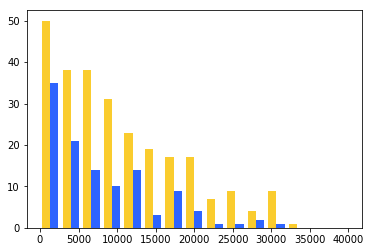

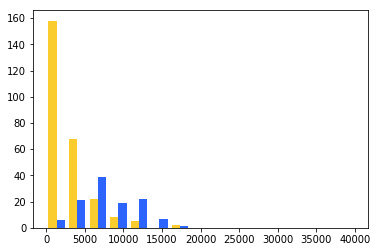

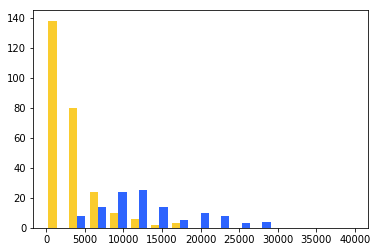

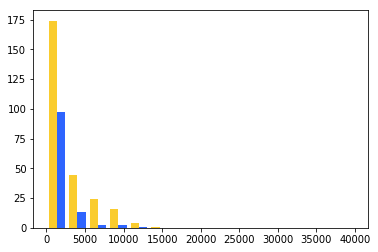

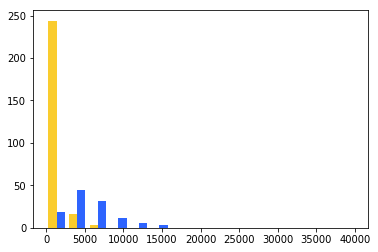

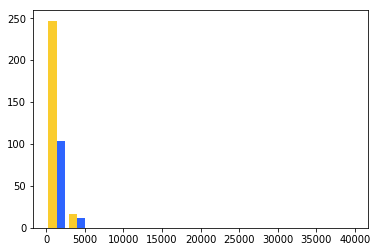

In [13]:
#データを観察（黄色：Horeca, 青：Retail）
plt.hist([df_c1['Fresh'],df_c2['Fresh']],
         bins=15, label=['Horeca','Retail'], color=['#FACC2E','#2E64FE'], range=(0,40000))
plt.show()
plt.hist([df_c1['Milk'],df_c2['Milk']],
         bins=15, label=['Horeca','Retail'], color=['#FACC2E','#2E64FE'], range=(0,40000))
plt.show()
plt.hist([df_c1['Grocery'],df_c2['Grocery']],
         bins=15, label=['Horeca','Retail'], color=['#FACC2E','#2E64FE'], range=(0,40000))
plt.show()
plt.hist([df_c1['Frozen'],df_c2['Frozen']],
         bins=15, label=['Horeca','Retail'], color=['#FACC2E','#2E64FE'], range=(0,40000))
plt.show()
plt.hist([df_c1['Detergents_Paper'],df_c2['Detergents_Paper']],
         bins=15, label=['Horeca','Retail'], color=['#FACC2E','#2E64FE'], range=(0,40000))
plt.show()
plt.hist([df_c1['Delicassen'],df_c2['Delicassen']],
         bins=15, label=['Horeca','Retail'], color=['#FACC2E','#2E64FE'], range=(0,40000))
plt.show()

In [ ]:
#参考にしたサイト　http://select-from-where.hatenablog.com/entry/2017/09/24/202340#市場細分化に基づくターゲット市場の選定